In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#this code has 6 parts. Order is that analysis row data,Item file,classification,User file, the firt way to do recommendation.

In [3]:
#this part is analysis row data

In [4]:
articles = pd.read_csv(r'articles.csv')
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
#articles=articles.sample(n=5000, replace=False,random_state=2)

In [6]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [7]:
temp=articles.select_dtypes(include=['int64','float64'])

In [8]:
temp.head(9)

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
0,108775015,108775,253,1010016,9,4,5,1676,1,16,1002
1,108775044,108775,253,1010016,10,3,9,1676,1,16,1002
2,108775051,108775,253,1010017,11,1,9,1676,1,16,1002
3,110065001,110065,306,1010016,9,4,5,1339,1,61,1017
4,110065002,110065,306,1010016,10,3,9,1339,1,61,1017
5,110065011,110065,306,1010016,12,1,11,1339,1,61,1017
6,111565001,111565,304,1010016,9,4,5,3608,1,62,1021
7,111565003,111565,302,1010016,13,2,11,3608,1,62,1021
8,111586001,111586,273,1010016,9,4,5,3608,1,62,1021


In [9]:
temp['detail_desc'] = articles['detail_desc']

<ipython-input-9-2f44303357c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['detail_desc'] = articles['detail_desc']


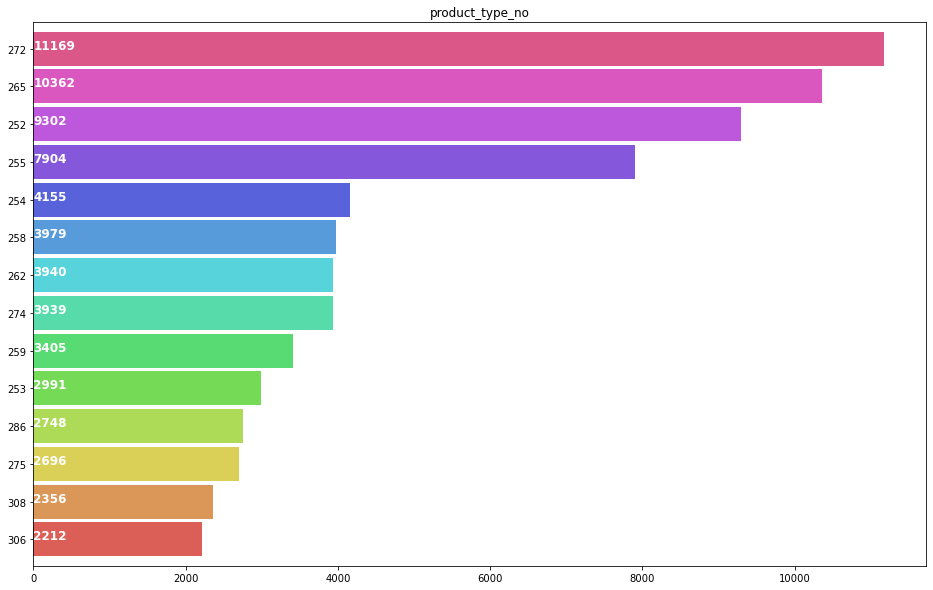

In [8]:
import seaborn as sns
plt.subplots(figsize=(16,10))
list1 = []
for i in temp['product_type_no']:
    list1.append(i)
ax = pd.Series(list1).value_counts()[:14].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',14))
for i, v in enumerate(pd.Series(list1).value_counts()[:14].sort_values(ascending=True)): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('product_type_no')
plt.show()

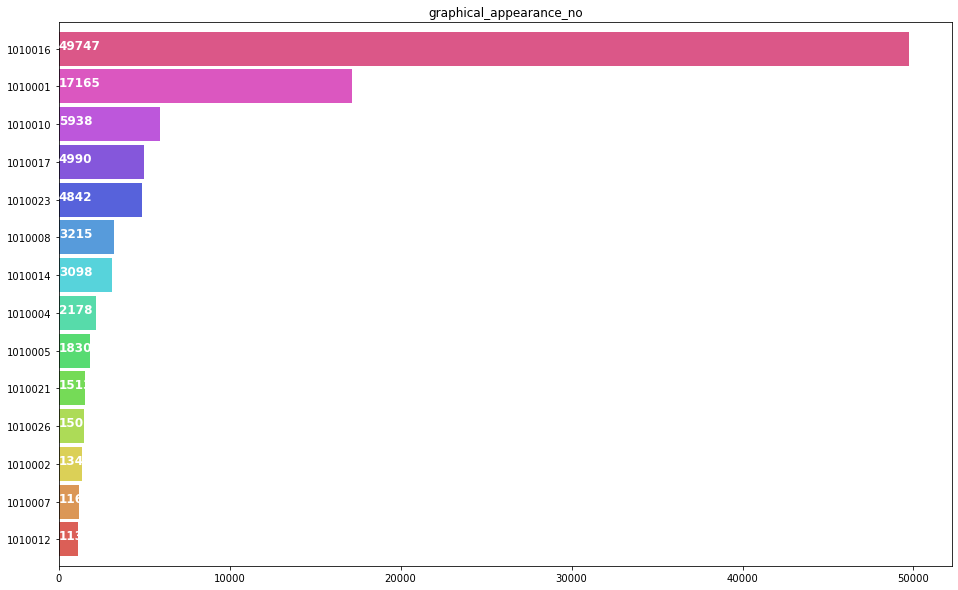

In [9]:
import seaborn as sns
plt.subplots(figsize=(16,10))
list1 = []
for i in temp['graphical_appearance_no']:
    list1.append(i)
ax = pd.Series(list1).value_counts()[:14].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',14))
for i, v in enumerate(pd.Series(list1).value_counts()[:14].sort_values(ascending=True)): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('graphical_appearance_no')
plt.show()

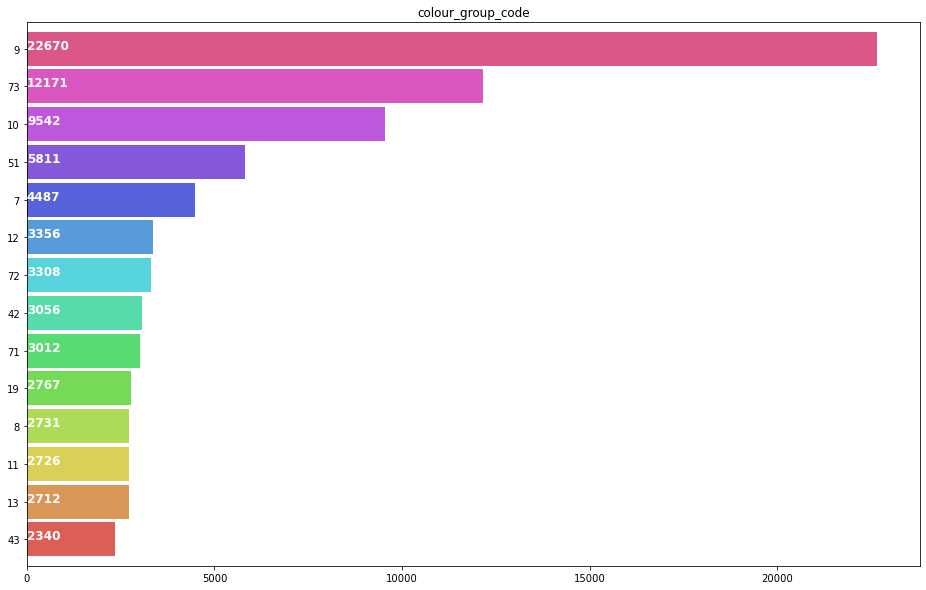

In [10]:
import seaborn as sns
plt.subplots(figsize=(16,10))
list1 = []
for i in temp['colour_group_code']:
    list1.append(i)
ax = pd.Series(list1).value_counts()[:14].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',14))
for i, v in enumerate(pd.Series(list1).value_counts()[:14].sort_values(ascending=True)): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('colour_group_code')
plt.show()

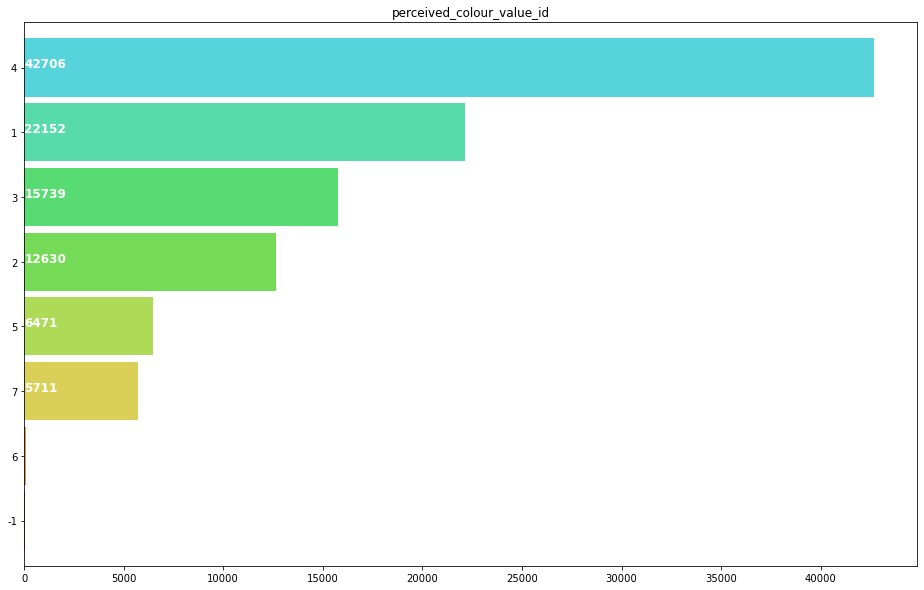

In [11]:
import seaborn as sns
plt.subplots(figsize=(16,10))
list1 = []
for i in temp['perceived_colour_value_id']:
    list1.append(i)
ax = pd.Series(list1).value_counts()[:14].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',14))
for i, v in enumerate(pd.Series(list1).value_counts()[:14].sort_values(ascending=True)): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('perceived_colour_value_id')
plt.show()

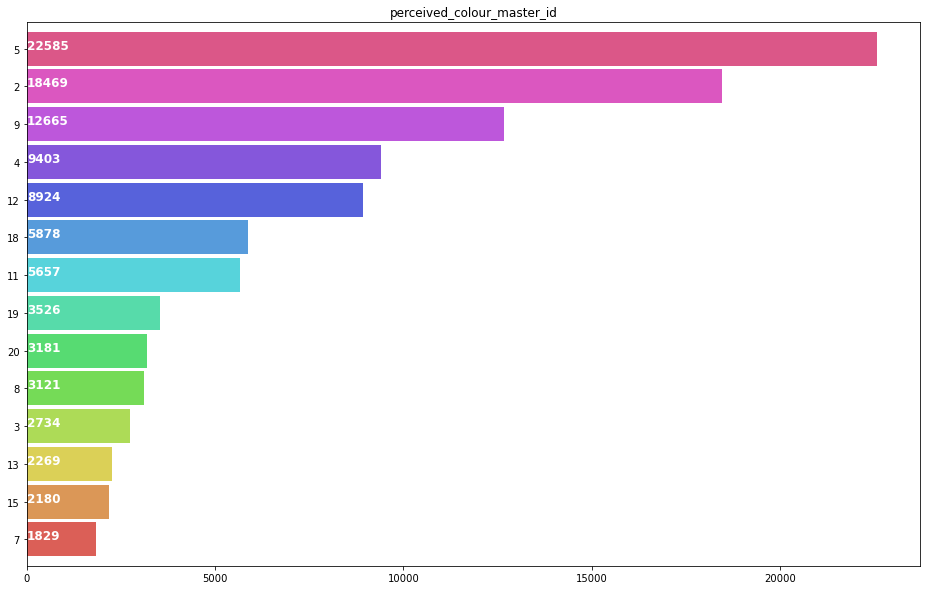

In [12]:
import seaborn as sns
plt.subplots(figsize=(16,10))
list1 = []
for i in temp['perceived_colour_master_id']:
    list1.append(i)
ax = pd.Series(list1).value_counts()[:14].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',14))
for i, v in enumerate(pd.Series(list1).value_counts()[:14].sort_values(ascending=True)): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('perceived_colour_master_id')
plt.show()

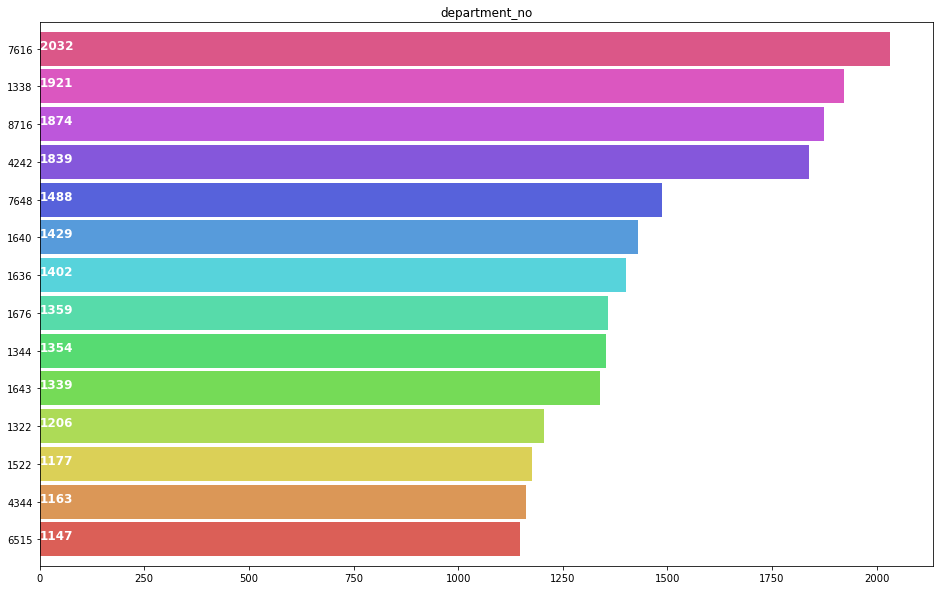

In [13]:
import seaborn as sns
plt.subplots(figsize=(16,10))
list1 = []
for i in temp['department_no']:
    list1.append(i)
ax = pd.Series(list1).value_counts()[:14].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',14))
for i, v in enumerate(pd.Series(list1).value_counts()[:14].sort_values(ascending=True)): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('department_no')
plt.show()

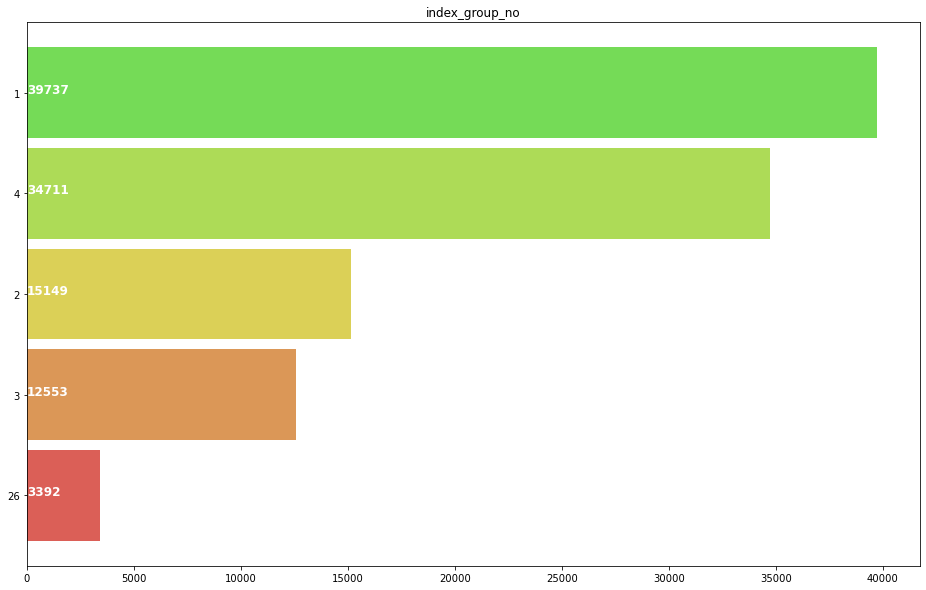

In [14]:
import seaborn as sns
plt.subplots(figsize=(16,10))
list1 = []
for i in temp['index_group_no']:
    list1.append(i)
ax = pd.Series(list1).value_counts()[:14].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',14))
for i, v in enumerate(pd.Series(list1).value_counts()[:14].sort_values(ascending=True)): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('index_group_no')
plt.show()

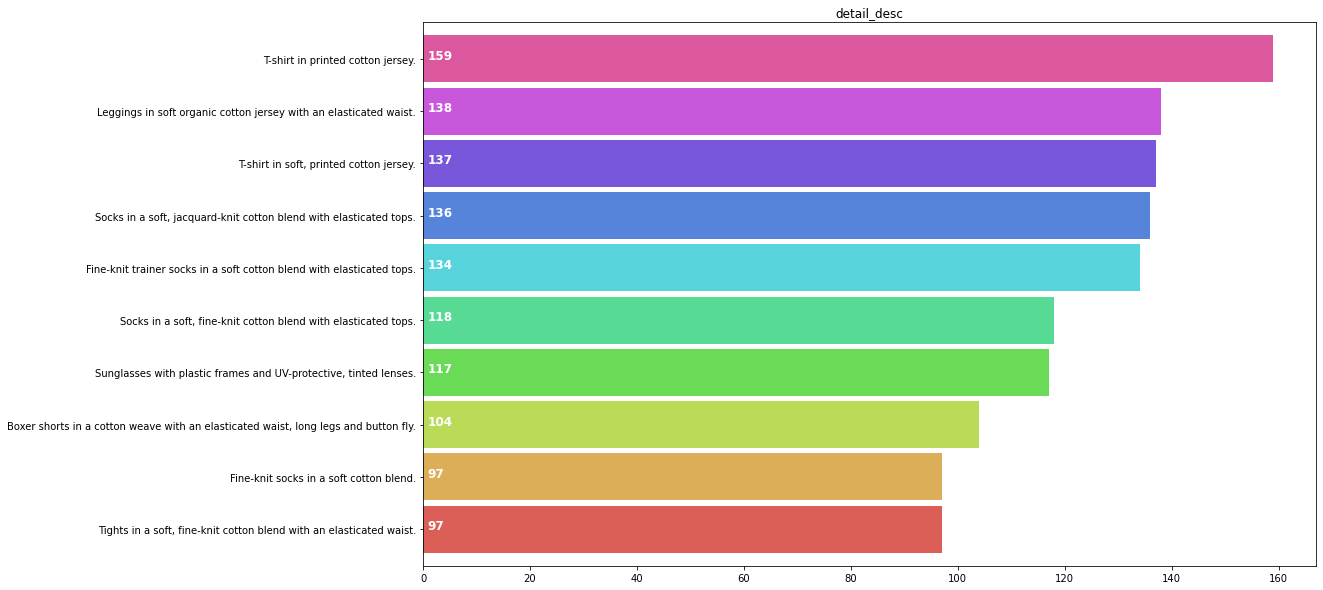

In [15]:
import seaborn as sns
plt.subplots(figsize=(16,10))
list1 = []
for i in articles['detail_desc']:
    list1.append(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True)): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('detail_desc')
plt.show()

In [ ]:
#this part is process of Item file

In [16]:
producttypenoList = []

In [17]:
for i in range(len(temp['product_type_no'])):
    if temp['product_type_no'][i] not in producttypenoList:
        producttypenoList.append(temp['product_type_no'][i])

In [26]:
def binary(prodtype_list):
    binaryList=[]
    for j in range(len(producttypenoList)):
        if producttypenoList[j] == prodtype_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [27]:
temp['product_type_no'] = temp['product_type_no'].apply(lambda x: binary(x))
temp['product_type_no'].head()

<ipython-input-27-db0716f6f372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['product_type_no'] = temp['product_type_no'].apply(lambda x: binary(x))


0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: product_type_no, dtype: object

In [18]:
graphicalappearancenoList = []
for j in range(len(temp['graphical_appearance_no'])):
    if temp['graphical_appearance_no'][j] not in graphicalappearancenoList:
        graphicalappearancenoList.append(temp['graphical_appearance_no'][j])


In [28]:
def binary1(graphical_appearance_no_list):
    binaryList=[]
    for j in range(len(graphicalappearancenoList)):
        if graphicalappearancenoList[j] == graphical_appearance_no_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [29]:
temp['graphical_appearance_no'] = temp['graphical_appearance_no'].apply(lambda x: binary1(x))
temp['graphical_appearance_no'].head()

<ipython-input-29-423c0daab649>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['graphical_appearance_no'] = temp['graphical_appearance_no'].apply(lambda x: binary1(x))


0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: graphical_appearance_no, dtype: object

In [19]:
colourgroupcodeList = []
for j in range(len(temp['colour_group_code'])):
    if temp['colour_group_code'][j] not in colourgroupcodeList:
        colourgroupcodeList.append(temp['colour_group_code'][j])

In [30]:
def binary2(colour_group_code_list):
    binaryList=[]
    for j in range(len(colourgroupcodeList)):
        if colourgroupcodeList[j] == colour_group_code_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [31]:
temp['colour_group_code'] = temp['colour_group_code'].apply(lambda x: binary2(x))
temp['colour_group_code'].head()

<ipython-input-31-0a34a8d20662>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['colour_group_code'] = temp['colour_group_code'].apply(lambda x: binary2(x))


0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: colour_group_code, dtype: object

In [20]:
perceivedcolourvalueidList = []
for j in range(len(temp['perceived_colour_value_id'])):
    if temp['perceived_colour_value_id'][j] not in perceivedcolourvalueidList:
        perceivedcolourvalueidList.append(temp['perceived_colour_value_id'][j])


In [32]:
def binary3(perceived_colour_value_id_list):
    binaryList=[]
    for j in range(len(perceivedcolourvalueidList)):
        if perceivedcolourvalueidList[j] == perceived_colour_value_id_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [33]:
temp['perceived_colour_value_id'] = temp['perceived_colour_value_id'].apply(lambda x: binary3(x))
temp['perceived_colour_value_id'].head()

<ipython-input-33-71cbfe8e3aff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['perceived_colour_value_id'] = temp['perceived_colour_value_id'].apply(lambda x: binary3(x))


0    [1, 0, 0, 0, 0, 0, 0, 0]
1    [0, 1, 0, 0, 0, 0, 0, 0]
2    [0, 0, 1, 0, 0, 0, 0, 0]
3    [1, 0, 0, 0, 0, 0, 0, 0]
4    [0, 1, 0, 0, 0, 0, 0, 0]
Name: perceived_colour_value_id, dtype: object

In [21]:
perceivedcolourmasteridList = []
for j in range(len(temp['perceived_colour_master_id'])):
    if temp['perceived_colour_master_id'][j] not in perceivedcolourmasteridList:
        perceivedcolourmasteridList.append(temp['perceived_colour_master_id'][j])
perceivedcolourmasteridList

[5, 9, 11, 12, 2, 4, 6, 18, 1, 3, 15, 13, 7, 8, 20, 19, 14, -1, 10, 16]

In [34]:
def binary4(perceived_colour_master_id_list):
    binaryList=[]
    for j in range(len(perceivedcolourmasteridList)):
        if perceivedcolourmasteridList[j] == perceived_colour_master_id_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [35]:
temp['perceived_colour_master_id'] = temp['perceived_colour_master_id'].apply(lambda x: binary4(x))
temp['perceived_colour_master_id'].head()

<ipython-input-35-886a69d7f18f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['perceived_colour_master_id'] = temp['perceived_colour_master_id'].apply(lambda x: binary4(x))


0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: perceived_colour_master_id, dtype: object

In [22]:
department_noList = []
for j in range(len(temp['department_no'])):
    if temp['department_no'][j] not in department_noList:
        department_noList.append(temp['department_no'][j])


In [36]:
def binary5(department_no_list):
    binaryList=[]
    for j in range(len(department_noList)):
        if department_noList[j] == department_no_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [37]:
temp['department_no'] = temp['department_no'].apply(lambda x: binary5(x))
temp['department_no'].head()

<ipython-input-37-48f5c0fd50bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['department_no'] = temp['department_no'].apply(lambda x: binary5(x))


0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: department_no, dtype: object

In [23]:
index_group_noList = []
for j in range(len(temp['index_group_no'])):
    if temp['index_group_no'][j] not in index_group_noList:
        index_group_noList.append(temp['index_group_no'][j])

In [38]:
def binary6(index_group_no_list):
    binaryList=[]
    for j in range(len(index_group_noList)):
        if index_group_noList[j] == index_group_no_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [39]:
temp['index_group_no'] = temp['index_group_no'].apply(lambda x: binary6(x))
temp['index_group_no'].head()

<ipython-input-39-9a393a5a0c4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['index_group_no'] = temp['index_group_no'].apply(lambda x: binary6(x))


0    [1, 0, 0, 0, 0]
1    [1, 0, 0, 0, 0]
2    [1, 0, 0, 0, 0]
3    [1, 0, 0, 0, 0]
4    [1, 0, 0, 0, 0]
Name: index_group_no, dtype: object

In [24]:
section_noList = []
for j in range(len(temp['section_no'])):
    if temp['section_no'][j] not in section_noList:
        section_noList.append(temp['section_no'][j])

In [40]:
def binary7(section_no_list):
    binaryList=[]
    for j in range(len(section_noList)):
        if section_noList[j] == section_no_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [41]:
temp['section_no'] = temp['section_no'].apply(lambda x: binary7(x))
temp['section_no'].head()

<ipython-input-41-e2430846191d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['section_no'] = temp['section_no'].apply(lambda x: binary7(x))


0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: section_no, dtype: object

In [25]:
garment_group_noList = []
for j in range(len(temp['garment_group_no'])):
    if temp['garment_group_no'][j] not in garment_group_noList:
        garment_group_noList.append(temp['garment_group_no'][j])

In [42]:
def binary8(garment_group_no_list):
    binaryList=[]
    for j in range(len(garment_group_noList)):
        if garment_group_noList[j] == garment_group_no_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [43]:
temp['garment_group_no'] = temp['garment_group_no'].apply(lambda x: binary8(x))
temp['garment_group_no'].head()

<ipython-input-43-6d35b728afcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['garment_group_no'] = temp['garment_group_no'].apply(lambda x: binary8(x))


0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: garment_group_no, dtype: object

In [151]:
detail_descList = []
for j in range(len(articles['detail_desc'])):
    if articles['detail_desc'][j] not in detail_descList:
        detail_descList.append(articles['detail_desc'][j])

In [45]:
# def binary9(detail_desc_list):
#     binaryList=[]
#     for j in range(len(detail_descList)):
#         if detail_descList[j] == detail_desc_list:
#             binaryList.append(1)
#         else:
#             binaryList.append(0)
#     return binaryList

In [44]:
# temp['detail_desc'] = temp['detail_desc'].apply(lambda x: binary9(x))
temp.head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no,detail_desc
0,108775015,108775,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Jersey top with narrow shoulder straps.
1,108775044,108775,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Jersey top with narrow shoulder straps.
2,108775051,108775,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Jersey top with narrow shoulder straps.
3,110065001,110065,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
#this part is classification

In [45]:
temp1 = temp.copy()

In [46]:
temp =  temp1.sample(n=9970, replace=False, random_state=1)

In [58]:
m = list(temp1)
hah = pd.DataFrame(columns = m)

In [ ]:
#I select this customer because I need a instance to do validation

In [59]:
for i in range(30):
    fuyu = temp1[temp1['article_id'] == goodid['000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8'][i]]
    temp = temp.append(fuyu)

In [60]:
temp.head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no,detail_desc
38159,656677021,656677,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",Short-sleeved shirt in a patterned viscose wea...
69760,758050001,758050,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",LOVE STORIES x H&M. Patterned bikini bottoms w...
55574,711043002,711043,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Sports shorts in fast-drying functional fabric...
88565,833548001,833548,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",Short coat in woven fabric with no buttons. Si...
79069,796535023,796535,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Short-sleeved top in printed cotton jersey.


In [61]:
temp = temp.reset_index(drop=True)

In [62]:
from sklearn import preprocessing

In [63]:
tt = temp.drop("product_code", axis=1)

In [64]:

tt = tt.drop("article_id", axis=1)


In [65]:
tt = tt.drop('detail_desc', axis=1)

In [66]:
import numpy as np
import pandas as pd

In [67]:
a = np.zeros(shape=(10000,622))


In [68]:
name  = list(tt)
name

['product_type_no',
 'graphical_appearance_no',
 'colour_group_code',
 'perceived_colour_value_id',
 'perceived_colour_master_id',
 'department_no',
 'index_group_no',
 'section_no',
 'garment_group_no']

In [69]:
for o in range(len(tt['product_type_no'])):
    kaoni = []
    for j in name:
        kaoni = np.append(kaoni,np.array(temp[j][o]))
    a[o] =  kaoni
        
    
    

In [70]:
a_real = a

In [71]:
min_max_scaler = preprocessing.MinMaxScaler()

In [72]:
a = min_max_scaler.fit_transform(a)

In [73]:
#a = preprocessing.scale(a)

In [74]:
tt.shape

(10000, 9)

In [75]:
from sklearn.cluster import KMeans

In [76]:
Kmeans = KMeans(n_clusters=8)

In [77]:
Kmeans.fit(a)

KMeans()

In [78]:
p=Kmeans.labels_

In [77]:
p

array([1, 3, 0, ..., 2, 3, 3])

In [153]:
kmeans_per_k = [KMeans(n_clusters=k).fit(a)
                for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

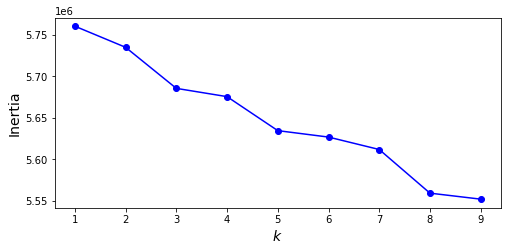

In [154]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

 
plt.show()

In [245]:
from scipy.cluster.hierarchy import linkage

In [252]:
hc_complete = linkage(a, "average")

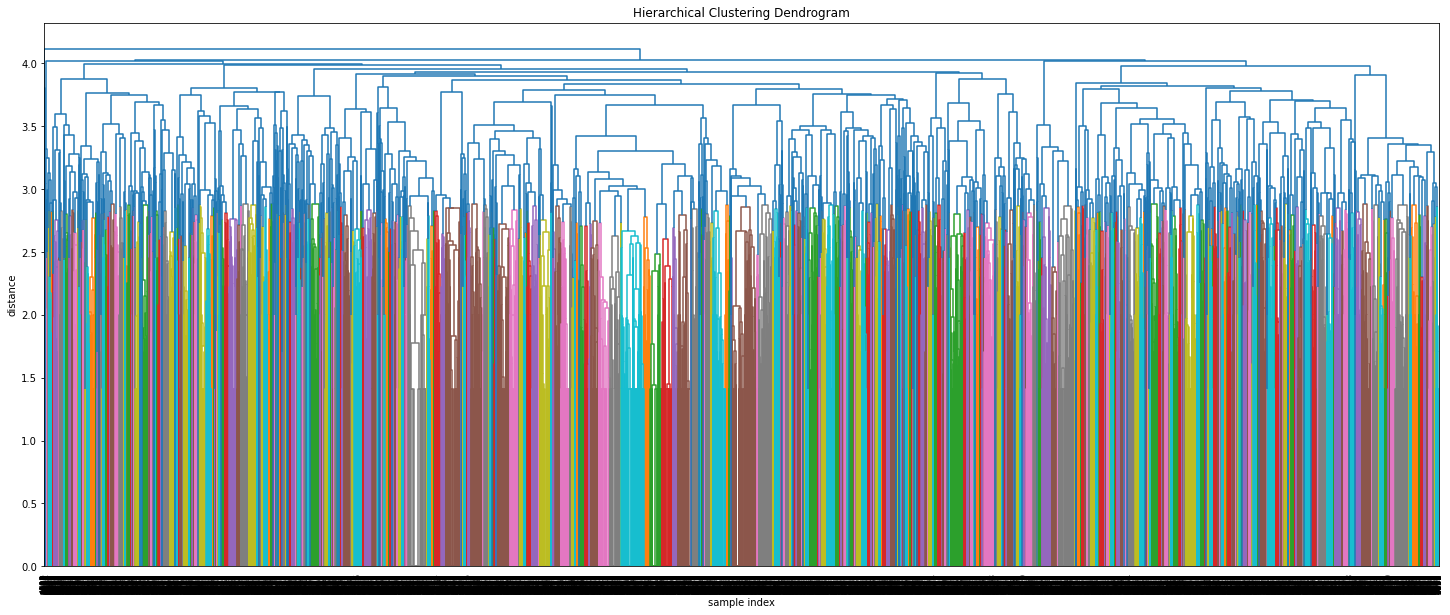

In [278]:
from scipy.cluster.hierarchy import dendrogram

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [69]:
from sklearn.cluster import AgglomerativeClustering

In [70]:
agg = AgglomerativeClustering(n_clusters=15,linkage="average", affinity="cosine")

In [71]:
agg.fit(a)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=15)

In [538]:
pp = agg.labels_

In [287]:
pp[2523]

0

In [241]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap
from sklearn.datasets import load_iris, load_boston
from sklearn.manifold import TSNE

In [242]:
model = TSNE()
j = model.fit_transform(a)

In [243]:
colors = ['C{}'.format(i) for i in range(10)]

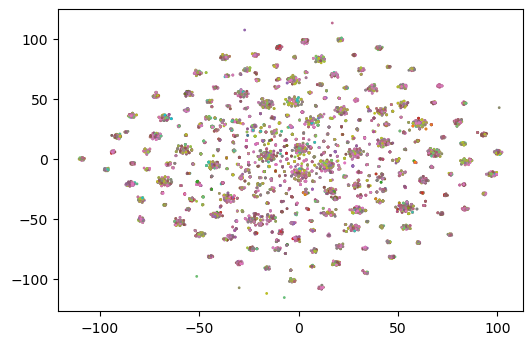

In [244]:
cmap = LinearSegmentedColormap.from_list('', colors[:len(np.unique(temp["product_code"]))])
plt.figure(dpi=100)
plt.scatter(j.T[0], j.T[1], c=temp["product_code"], cmap=cmap, s=1)

In [269]:
import datasketch

In [ ]:
#this part is User file

In [49]:
transactions_train = pd.read_csv(r'transactions_train.csv')
transactions_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [50]:
transactions_train['customer_id']

0           000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
1           000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2           00007d2de826758b65a93dd24ce629ed66842531df6699...
3           00007d2de826758b65a93dd24ce629ed66842531df6699...
4           00007d2de826758b65a93dd24ce629ed66842531df6699...
                                  ...                        
31788319    fff2282977442e327b45d8c89afde25617d00124d0f999...
31788320    fff2282977442e327b45d8c89afde25617d00124d0f999...
31788321    fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...
31788322    fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...
31788323    fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...
Name: customer_id, Length: 31788324, dtype: object

In [51]:
transactions_train['customer_id'][1] == transactions_train['customer_id'][0]


True

In [52]:
sta = {}
goodid = {}

In [53]:
cid = []
ptypeno =[]
graphno = []
colourg =[]
pcolour = []
pcolourmas = []
departno = []
indexg = []
secno = []
garno = []
dede= []

In [54]:
j = 0
while j<=1000:
    if transactions_train["customer_id"][j] not in cid:
        sta[transactions_train["customer_id"][j]]=1
        goodid.setdefault(transactions_train["customer_id"][j],[]).append(transactions_train["article_id"][j])
        #goodid[transactions_train["customer_id"][j]] = transactions_train["article_id"][j]
        cid.append(transactions_train["customer_id"][j])
        z = articles["article_id"]==transactions_train["article_id"][j]
        
        ptype = [0 for ii in producttypenoList]
        for i in range(len(producttypenoList)):
            if float(producttypenoList[i]) == float(articles['product_type_no'][z]):
                ptype[i] = 1
        ptypeno.append(ptype)
        
        
        
        
        gra = [0 for qi in graphicalappearancenoList]
        for q in range(len(graphicalappearancenoList)):
            if float(graphicalappearancenoList[q]) == float(articles['graphical_appearance_no'][z]):
                gra[q] = 1
        graphno.append(gra)
        
        
        
        cg = [0 for qs in colourgroupcodeList]
        for qq in range(len(colourgroupcodeList)):
            if float(colourgroupcodeList[qq]) == float(articles['colour_group_code'][z]):
                cg[qq] = 1
        colourg.append(cg)
        
        
        
        
        pa = [0 for qs in perceivedcolourvalueidList]
        for p in range(len(perceivedcolourvalueidList)):
            if float(perceivedcolourvalueidList[p]) == float(articles['perceived_colour_value_id'][z]):
                pa[p] = 1
        pcolour.append(pa)
        
        
        
        m = [0 for qs in perceivedcolourmasteridList]
        for mm in range(len(perceivedcolourmasteridList)):
            if float(perceivedcolourmasteridList[mm]) == float(articles['perceived_colour_master_id'][z]):
                m[mm] = 1
        pcolourmas.append(m)
        
        
        
        ss = [0 for qs in department_noList]
        for yu in range(len(department_noList)):
            if float(department_noList[yu]) == float(articles['department_no'][z]):
                ss[yu] = 1
        departno.append(ss)
        
        
        
        xg = [0 for qs in index_group_noList]
        for dd in range(len(index_group_noList)):
            if float(index_group_noList[dd]) == float(articles['index_group_no'][z]):
                xg[dd] = 1
        indexg.append(xg)
        
        
        
        cc = [0 for qs in section_noList]
        for dd in range(len(section_noList)):
            if float(section_noList[dd]) == float(articles['section_no'][z]):
                cc[dd] = 1
        secno.append(cc)
        
        
        gg = [0 for qs in garment_group_noList]
        for dd in range(len(garment_group_noList)):
            if float(garment_group_noList[dd]) == float(articles['garment_group_no'][z]):
                gg[dd] = 1
        garno.append(gg)
        
#         ee = [0 for qs in detail_descList]
#         for dd in range(len(detail_descList)):
#             u = detail_descList[dd]
#             uu = articles['detail_desc'][z]
#             if len(u) == len(uu):
#                 ee[dd] = 1
#         dede.append(ee)
        
        j += 1
        #temp['product_type_no'] = temp['product_type_no'].apply(lambda x: binary(x))
    else:
        sta[transactions_train["customer_id"][j]] +=1
        goodid.setdefault(transactions_train["customer_id"][j],[]).append(transactions_train["article_id"][j])
        z = articles["article_id"]==transactions_train["article_id"][j]
        de= cid.index(transactions_train["customer_id"][j])
        
        
        for i in range(len(producttypenoList)):
            if float(producttypenoList[i]) == float(articles['product_type_no'][z]):
                ptypeno[de][i] += 1
                
                
        for q in range(len(graphicalappearancenoList)):
            if float(graphicalappearancenoList[q]) == float(articles['graphical_appearance_no'][z]):
                graphno[de][q] += 1
                
        
        for qq in range(len(colourgroupcodeList)):
            if float(colourgroupcodeList[qq]) == float(articles['colour_group_code'][z]):
                colourg[de][qq] += 1
        
        for p in range(len(perceivedcolourvalueidList)):
            if float(perceivedcolourvalueidList[p]) == float(articles['perceived_colour_value_id'][z]):
                pcolour[de][p] += 1
        
        for mm in range(len(perceivedcolourmasteridList)):
            if float(perceivedcolourmasteridList[mm]) == float(articles['perceived_colour_master_id'][z]):
                pcolourmas[de][mm] += 1
        
        
        for dd in range(len(department_noList)):
            if float(department_noList[dd]) == float(articles['department_no'][z]):
                departno[de][dd] += 1
        
                
        for dd in range(len(index_group_noList)):
            if float(index_group_noList[dd]) == float(articles['index_group_no'][z]):
                indexg[de][dd] += 1
    
                
        for dd in range(len(section_noList)):
            if float(section_noList[dd]) == float(articles['section_no'][z]):
                secno[de][dd] += 1
        
        
        for dd in range(len(garment_group_noList)):
            if float(garment_group_noList[dd]) == float(articles['garment_group_no'][z]):
                garno[de][dd] += 1
        
#         for dd in range(len(detail_descList)):
#             u = detail_descList[dd]
#             uu = articles['detail_desc'][z]
#             if len(u) == len(uu):
#                 dede[de][dd] += 1       
        j += 1
        
        


In [55]:
from pandas.core.frame import DataFrame

In [56]:
dic={'article_id':cid,'product_type_no':ptypeno,'graphical_appearance_no':graphno,'colour_group_code':colourg,'perceived_colour_value_id':pcolour,'perceived_colour_master_id':pcolourmas,'department_no':departno,'index_group_no':indexg,'section_no':secno,'garment_group_no':garno}
cum_feature = DataFrame(dic)

In [57]:
cum_feature

,article_id,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0]","[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,00007d2de826758b65a93dd24ce629ed66842531df6699...,"[0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, ...","[2, 0, 0, 2, 0, 1, 0, 0]","[0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ..."
2,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,"[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ...","[4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[2, 0, 2, 1, 0, 0, 0, 0]","[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ..."
3,0008968c0d451dbc5a9968da03196fe20051965edde741...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ..."
4,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,"[8, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, ...","[13, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0,...","[11, 9, 0, 0, 0, 2, 0, 4, 0, 0, 0, 2, 0, 0, 0,...","[13, 9, 6, 0, 2, 0, 0, 0]","[11, 9, 0, 6, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12, 0, 0, 0, 18]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, ...","[3, 0, 0, 13, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...,...
297,057e275b214b3d97a8caa75a3b802bf2ffda4d490189a1...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
298,05887aca6a1742c97497dded62e474cc10b5c5d783eaff...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
299,0592e247fc4388fe73eaacb8d8577e5d817b4b0c7e679c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 3, 1, 0, 1, 1, 0]","[1, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6, 0, 0, 0, 4]","[2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, ..."
300,05943a58bd172641b80919a9bdf14012df940800bc74d0...,"[0, 0, 0, 0, 0, 0, 0, 0,

In [109]:
goodid#this record items' id each customer brought 

{'000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318': [663713001,
  541518023],
 '00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2': [505221004,
  685687003,
  685687004,
  685687001,
  505221001],
 '00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280': [688873012,
  501323011,
  598859003,
  688873020,
  688873011],
 '0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2': [531310002,
  529841001],
 '000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8': [501820043,
  501820043,
  674681001,
  671505001,
  671505001,
  631848002,
  631848002,
  631848002,
  631848002,
  680187001,
  676827002,
  676827002,
  685687002,
  685687002,
  680912006,
  680912006,
  692454002,
  692454002,
  640639001,
  640639001,
  664421002,
  664421002,
  680912009,
  680912009,
  553139001,
  553139001,
  377277001,
  377277001,
  700819006,
  700819006],
 '001127bffdda108579e6cb16080440e89bf1250a776c6e55f56e35e9ee029a8d': [397068015],
 

In [99]:
sta#this record the number of each customer

{'000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318': 2,
 '00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2': 5,
 '00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280': 5,
 '0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2': 2,
 '000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8': 30,
 '001127bffdda108579e6cb16080440e89bf1250a776c6e55f56e35e9ee029a8d': 1,
 '001ea4e9c54f7e9c88811260d954edc059d596147e1cf8adc73323aebf571fd8': 2,
 '001fd23db1109a94bba1319bb73df0b479059027c182da490e1161b34cd3af61': 2,
 '0021da829b898f82269fc51feded4eac2129058ee95bd75bb1591e2eb14ecc79': 4,
 '00228762ecff5b8d1ea6a2e52b96dafa198febddbc3bf350eb611f28e61ea6ce': 1,
 '002b3c0a44a22c45a8d62ea9d2b88d1a89e335f8b8400335a85c3b5845794cb9': 3,
 '003ac6eff3ca20cbe4e14a106a5e28b7551616005de8f9dd0f9455e5543b31ac': 4,
 '00401a367c5ac085cb9d4b77c56f3edcabf25153615db982fcc7991d182e10a9': 11,
 '00402f4463c8dc1b3ee54abfdea280e96cd87320449eca8953eb06769a5c

In [ ]:
#this is firt way to do recommendation. Just using Item file and User file to do cosine similarity and recommend top 10.

In [79]:
import copy
import math

In [80]:
def Recommdation_10(idd,User,temp,pp):
    wuyu = np.zeros(shape=(1,622))
    userarray = []
    for j in name:
        userarray = np.append(userarray,np.array(User[j]))
    real = userarray
    userarray = userarray/sta[idd]
    #userarray = preprocessing.scale(userarray)
    wuyu[0] = userarray
    #wuyu = preprocessing.scale(wuyu)
    group = Kmeans.predict(wuyu)
    ind = []
    for i in range(len(pp)):
        if pp[i] == group:
            ind.append(i)
    cos = []
    RMES = []
    minm = 0
    for o in range(len(ind)):
        d1=np.dot(a[o],userarray)/(np.linalg.norm(a[o])*np.linalg.norm(userarray))
        cos.append(d1)
        MSE = np.square(np.subtract(userarray,a[o])).mean()
        NRMSE11 = math.sqrt(MSE)/(max(userarray.max(),a[o].max())-min(userarray.min(),a[o].min()))
        RMES.append(NRMSE11)
    t2 = copy.deepcopy(cos)
# 求m个最大的数值及其索引
    max_number2 = []
    max_index2 = []
    for _ in range(10):
        number2 = max(t2)
        index2 = t2.index(number2)
        t2[index2] = 0
        max_number2.append(number2)
        max_index2.append(index2)
    res = []
    final_r = []
    for p in max_index2:
        res.append(temp['article_id'][ind[p]])
        final_r.append(RMES[p])
        
    return (userarray,res,cos,final_r)
        
        
        
    
            
        
    
    
    
    

In [81]:
pot = cum_feature.drop('article_id', axis=1)
User = pot.iloc[2]

In [82]:
(userarray,res,group,final_r) = Recommdation_10(cum_feature['article_id'][2],User,temp,p)

In [83]:
res

[700758014,
 723621004,
 543352005,
 815563001,
 781613016,
 879012003,
 663385001,
 811835005,
 903824003,
 622094008]

In [86]:
fi = goodid[cum_feature['article_id'][2]].copy()
real_id = list(set(fi))
real_id

[501323011, 688873011, 688873012, 598859003, 688873020]

In [121]:
for i in range(100):
    User = pot.iloc[i]
    (userarray,res,group,final_r) = Recommdation_10(cum_feature['article_id'][i],User,temp,p)
    summ = 0
    for laji in range(len(final_r)):
        summ += final_r[laji]
    junzhi_100.append(summ/10)
    
        

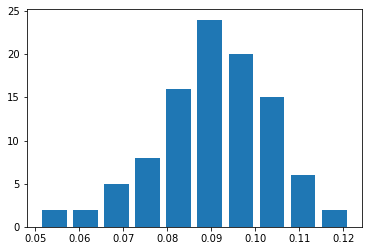

In [124]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.hist(junzhi_100,bins=10, rwidth=.8)
plt.show()